# Explore Brain Data During Pregnancy

This notebook loads and visualizes the brain data available in the folder `/home/data/pregnancy`

## Set-up

In [1]:
import src.setcwd

src.setcwd.main()

Working directory:  /home/nmiolane/code/my28brains/my28brains
Directory added to path:  /home/nmiolane/code/my28brains
Directory added to path:  /home/nmiolane/code/my28brains/my28brains
Directory added to path:  /home/nmiolane/code/my28brains/H2_SurfaceMatch
Directory added to path:  /home/nmiolane/code/my28brains/my28brains/notebooks
Directory added to path:  /home/nmiolane/code/my28brains/my28brains/notebooks/csv


## Imports

In [2]:
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
import nibabel
import numpy as np
from IPython.display import HTML
from nilearn import plotting
from PIL import Image, ImageDraw, ImageFont

import my28brains.viz as viz

INFO: Using pytorch backend


In [3]:
PREGNANCY_DIR = "/home/data/pregnancy"

# Visualize Brain Anatomy

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 208 320 320   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float64
bitpix          : 64
slice_start     : 0
pixdim          : [1.         0.79999995 0.796875   0.796875   0.         0.
 0.         0.        ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 0.006981283
qoffset_x       : -83.036316
qoffset_y       : -95.6248

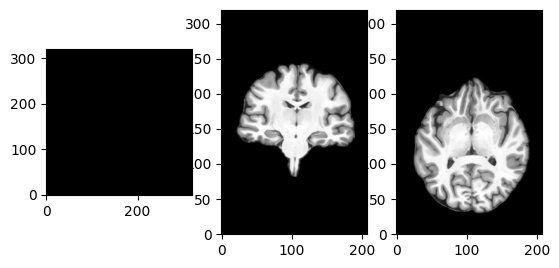

In [4]:
img_path = os.path.join(PREGNANCY_DIR, "BrainNormalizedToTemplate.nii.gz")
img = nibabel.load(img_path)
print(img.header)
img_data = img.get_fdata()
print(img_data.shape)

slice_0 = img_data[206, :, :]
slice_1 = img_data[:, 130, :]
slice_2 = img_data[:, :, 160]
_ = viz.show_slices([slice_0, slice_1, slice_2])

In [5]:
# Interactive view: commenting because it takes time to load
# view = plotting.view_img(img, bg_img=False)
# view

## Visualize Brain Segmentation

In [6]:
img_path = os.path.join(PREGNANCY_DIR, "BrainSegmentationPosteriors2_Warped.nii.gz")
img = nibabel.load(img_path)
print(img.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 208 320 320   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float64
bitpix          : 64
slice_start     : 0
pixdim          : [1.         0.79999995 0.796875   0.796875   0.         0.
 0.         0.        ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 0.006981283
qoffset_x       : -83.036316
qoffset_y       : -95.6248

(208, 320, 320)


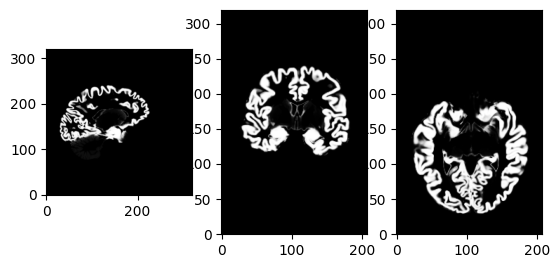

In [7]:
img_data = img.get_fdata()
print(img_data.shape)

slice_0 = img_data[126, :, :]
slice_1 = img_data[:, 150, :]
slice_2 = img_data[:, :, 150]
_ = viz.show_slices([slice_0, slice_1, slice_2])

In [8]:
# Interactive view: commenting because it takes time to load
# view = plotting.view_img(img, bg_img=False)
# view

# Visualize Segmentation of the Hippocampus

10
(448, 448, 31)


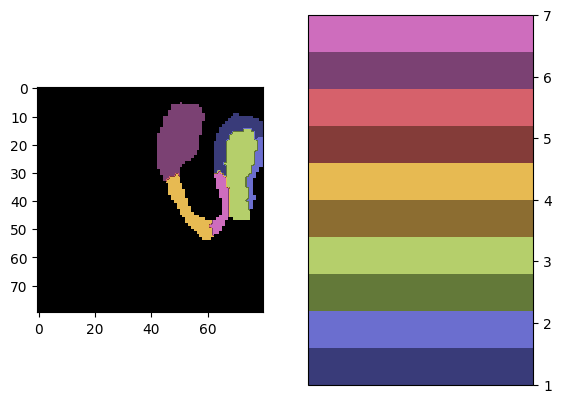

In [9]:
img_path = os.path.join(
    PREGNANCY_DIR, "Segmentations/BB01/left_lfseg_corr_usegray_CT_PRHC.nii.gz"
)

img = nibabel.load(img_path)
img_data = img.get_fdata()
print(len(np.unique(img_data.flatten())))
# Set value 0 to "bad data"
img_data = np.ma.masked_where(img_data < 0.05, img_data)
print(img_data.shape)

cmap = mpl.cm.get_cmap("tab20b").copy()
cmaplist = [cmap(2 * i) for i in range(10)]
cmap = mpl.colors.LinearSegmentedColormap.from_list("Custom cmap", cmaplist, 10)
cmap.set_bad(color="black")

fig, axes = plt.subplots(nrows=1, ncols=2)
im = axes[0].imshow(img_data[120:200, 120:200, 16], cmap=cmap)
fig.colorbar(im, cax=axes[-1]);

In [10]:
# Interactive view: commenting because it takes time to load.
# view = plotting.view_img(img, bg_img=False, cmap=cmap)
# view

# Play Video of 2D Slice from a Time-Series of 3D Images

Choose which video to play, among:
- `BrainNormalizedToTemplate.nii.gz`
- `BrainSegmentationPosteriors2_Warped.nii.gz`

Found 26 image paths. Creating video.
['/home/data/pregnancy/folder1/ses-01/BrainSegmentationPosteriors2_Warped.nii.gz', '/home/data/pregnancy/folder1/ses-02/BrainSegmentationPosteriors2_Warped.nii.gz', '/home/data/pregnancy/folder1/ses-03/BrainSegmentationPosteriors2_Warped.nii.gz', '/home/data/pregnancy/folder1/ses-04/BrainSegmentationPosteriors2_Warped.nii.gz', '/home/data/pregnancy/folder1/ses-05/BrainSegmentationPosteriors2_Warped.nii.gz', '/home/data/pregnancy/folder1/ses-06/BrainSegmentationPosteriors2_Warped.nii.gz', '/home/data/pregnancy/folder1/ses-07/BrainSegmentationPosteriors2_Warped.nii.gz', '/home/data/pregnancy/folder1/ses-08/BrainSegmentationPosteriors2_Warped.nii.gz', '/home/data/pregnancy/folder1/ses-09/BrainSegmentationPosteriors2_Warped.nii.gz', '/home/data/pregnancy/folder1/ses-10/BrainSegmentationPosteriors2_Warped.nii.gz', '/home/data/pregnancy/folder1/ses-11/BrainSegmentationPosteriors2_Warped.nii.gz', '/home/data/pregnancy/folder1/ses-12/BrainSegmentationPoste

INFO: Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
INFO: MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 640x480 -pix_fmt rgba -framerate 20.0 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y /tmp/tmppkanmaqn/temp.m4v


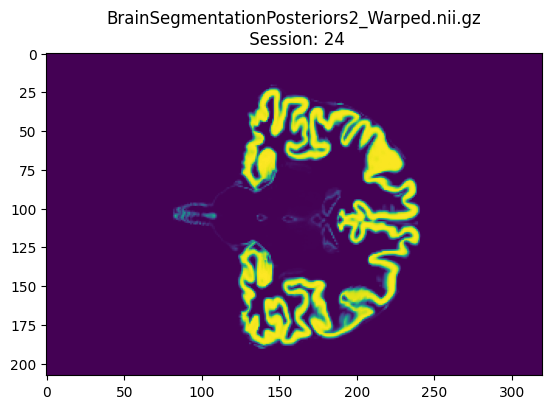

In [11]:
#img_suffix = "BrainNormalizedToTemplate.nii.gz"
img_suffix = "BrainSegmentationPosteriors2_Warped.nii.gz"

anima = viz.animate(
    img_suffix=img_suffix,
    img_dir=os.path.join(PREGNANCY_DIR, "folder1"),
    slice_y=130,
)
HTML(anima.to_html5_video())